In [1]:
import numpy as np
import scipy
import scipy.stats
import matplotlib.pyplot as plt # note, this is often imported as "plt"
import datetime # for time series data

# special code for Jupyter Notebook; allows in-line plotting (may not be needed on your machine)
%matplotlib inline

# Let's create an artificial dataset with some a relationship

In [2]:
np.random.seed(2)
A=np.random.normal(scale=2.,size=(300))

In [3]:
np.random.seed(1)
B=A*1.5+np.random.normal(scale=4,size=(300))

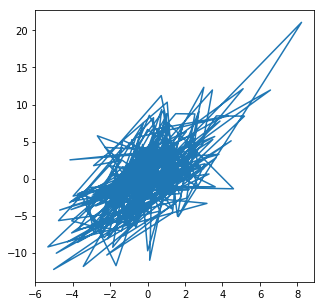

In [4]:
fig=plt.figure(figsize=(5,5))
ax = fig.add_subplot(1,1,1) # rows, columns, current figure

# use that axes object to plot
ax.plot(A, B)

The default is a line plot. Below are two ways of creating a scatter plot

Text(0,0.5,'B')

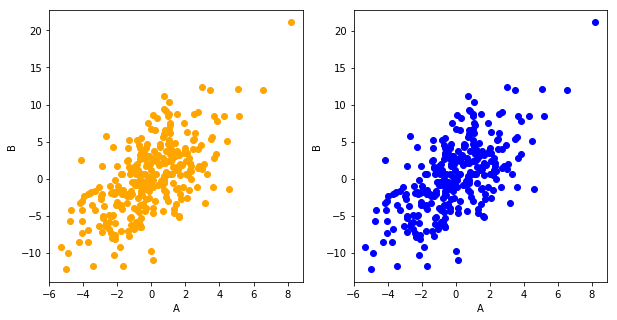

In [5]:
fig=plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,2,1) # rows, columns, current figure

# use that axes object to plot
ax.plot(A, B, 'o',c='orange')
ax.set_xlabel('A')
ax.set_ylabel('B')

ax2 = fig.add_subplot(1,2,2) # rows, columns, current figure

# use that axes object to plot
plt.scatter(A, B,c='blue',marker='o')
ax2.set_xlabel('A')
ax2.set_ylabel('B')

What if we had another dimension to the data that we wanted to plot?

In [6]:
np.random.seed(3)
C=2.*A+3.*B+np.random.randn(300)

Text(0.5,1,'Scatter between A and B colored by C \n')

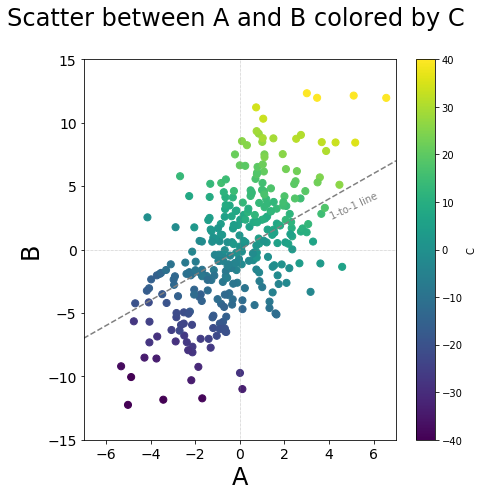

In [7]:
fig=plt.figure(figsize=(7,7))
ax = fig.add_subplot(1,1,1) # rows, columns, current figure
ax.tick_params(axis='both', which='major', labelsize=14) #set parameters like labelsize for tick marks
ax.plot([-7,7],[0,0],':',linewidth=0.5,c='gray')         #thinly show where zero lines are
ax.plot([0,0],[-15,15],':',linewidth=0.5,c='gray')       #thinly show where zero lines are
ax.plot([-7,7],[-7,7],'--',c='gray')                    #show 1 to 1 line
ax.text(4,4,'1-to-1 line',rotation=25,color='gray')
scat_plot=ax.scatter(A, B, c=C,s=50,vmin=-40,vmax=40) #c is for color #vmin sets mincolor #vmax sets maxcolor
ax.set_xlabel('A',fontsize=24)
ax.set_ylabel('B',fontsize=24)
cbar=plt.colorbar(scat_plot)
cbar.set_label('C')
ax.set_xlim((-7,7))
ax.set_ylim((-15,15))
ax.set_title('Scatter between A and B colored by C \n',fontsize=24)

## Next, let's try making surface plots

In [8]:
X_edges=np.arange(-8.5,9.0,2)
print(X_edges)

[-8.5 -6.5 -4.5 -2.5 -0.5  1.5  3.5  5.5  7.5]


In [9]:
Y_edges=np.arange(-14.5,15,2)

In [10]:
TwoDhist_of_AB,xedges,yedges=np.histogram2d(A,B,bins=(X_edges,Y_edges))

In [11]:
TwoDhist_of_AB=TwoDhist_of_AB.T

In [12]:
X,Y=np.meshgrid(xedges,yedges)
X.shape

(15, 9)

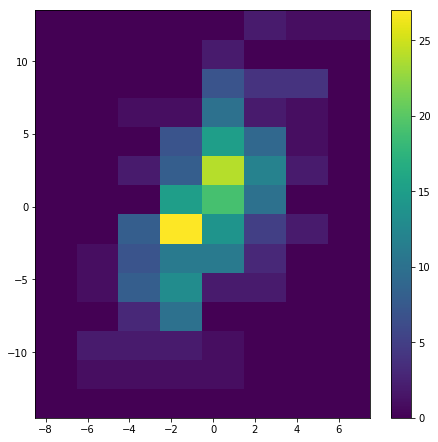

In [13]:
fig=plt.figure(figsize=(7.5,7.5))
ax=fig.add_subplot(1,1,1)
colormesh=ax.pcolormesh(X,Y,TwoDhist_of_AB)
plt.colorbar(colormesh)

In [14]:
X.shape

(15, 9)

In [15]:
TwoDhist_of_AB.shape

(14, 8)

In [16]:
X_center=(xedges[:-1]+xedges[1:])/2
Y_center=(yedges[:-1]+yedges[1:])/2
X_contour,Y_contour=np.meshgrid(X_center,Y_center)

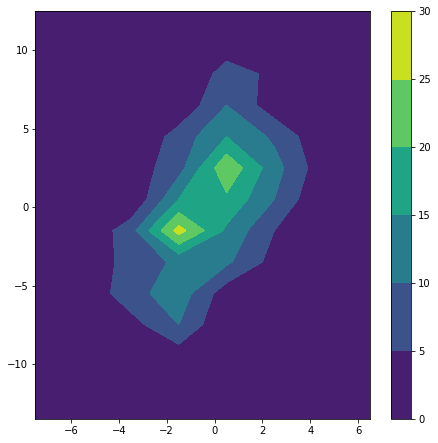

In [17]:
fig=plt.figure(figsize=(7.5,7.5))
ax=fig.add_subplot(1,1,1)
contourmap=ax.contourf(X_contour,Y_contour,TwoDhist_of_AB,levels=[0,5,10,15,20,25,30])
plt.colorbar(contourmap)

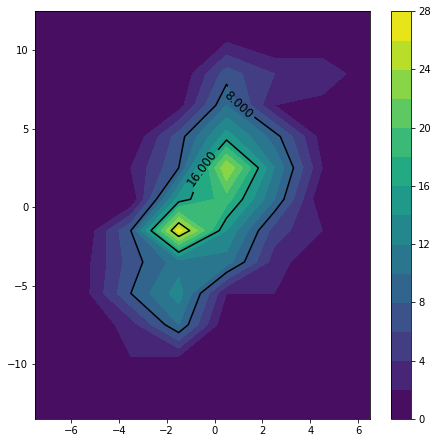

In [18]:
fig=plt.figure(figsize=(7.5,7.5))
ax=fig.add_subplot(1,1,1)
contourmap=ax.contourf(X_contour,Y_contour,TwoDhist_of_AB,levels=np.arange(0,30,2))
contours=ax.contour(X_contour,Y_contour,TwoDhist_of_AB,levels=[8,16,24],colors='k')
ax.clabel(contours, fontsize=12, inline=1)
plt.colorbar(contourmap)